   # 🛳️ **Titanic Survival Prediction**  

# ***🎯 Goals & Tasks:*** 

* 1. Provide insight by means of data. 

# ***🗂️ Import Libraries*** 

In [1]:
import os

import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore') 

# ***⏳ Data Loading*** 

In [2]:
os.listdir('/kaggle/input/titanic-data')  
df = pd.read_csv('/kaggle/input/titanic-data/train.csv') 

# ***🔭 Data Exploration***  

### 1. 🔍 **Take a Glimpse of Data**

In [3]:
df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2. 🔍 **DataType of Each Column**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. 🔍 **Dimensions of the DataFrame**

In [6]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')  

Rows: 891
Columns: 12


### 4. 🔍 **Descriptive Statistics for numerical & categorical variables**

In [7]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
categorical_var = df.dtypes[df.dtypes == 'object'].index
df[categorical_var].describe() 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 5. 🔍 **Missing Values & Outliers**

In [9]:
df.isnull().sum().sort_values(ascending = False) 

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
(df.isnull().sum() / len(df)).sort_values(ascending = False) 

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

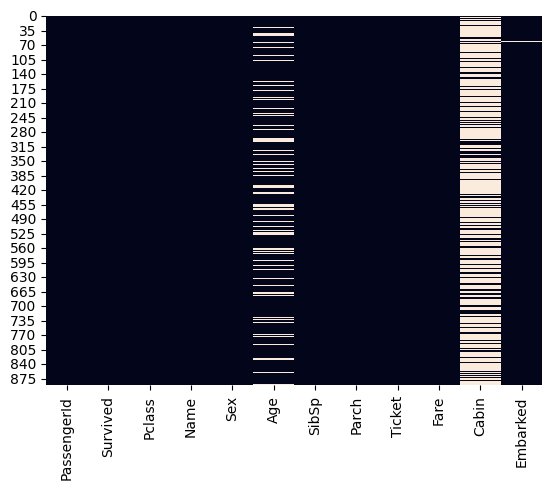

In [11]:
sns.heatmap(df.isnull(), cbar = False)
plt.show() 

In [12]:
df['Age'].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

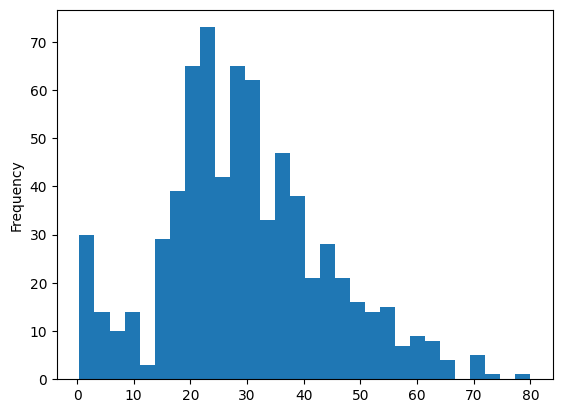

In [13]:
df['Age'].plot(kind='hist',
              bins = 30)
plt.show() 

In [14]:
age_median = df['Age'].median() 

In [15]:
new_age = np.where(df['Age'].isnull(),
                   age_median,
                   df['Age']) 
df['Age'] = new_age
df['Age'].describe() 

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

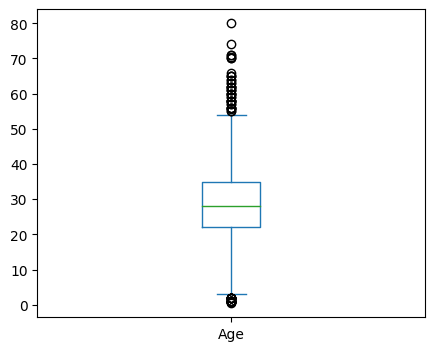

In [16]:
df['Age'].plot(kind = 'box', 
               figsize = (5, 4))
plt.show() 

In [17]:
df['Fare'].describe() 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

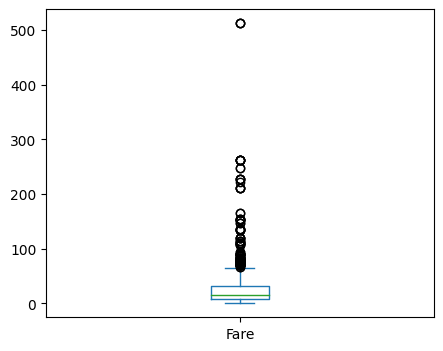

In [18]:
df['Fare'].plot(kind = 'box',
                figsize = (5, 4)) 

#  📰 ***Conclusion Set 1 from Data Exploration***

1. The columns have float datatypes are 2, integer datatype 5, object datatype are 5

2. There are 891 rows and 12 columns in the dataset.

# 🔨  ***Data Cleaning***  

### 1. 🔍 **Col: PassengerId**

*  "PassengerId" is just a number assigned to each passenger.
*   It is nothing more than an arbitrary identifier. 

In [19]:
del df['PassengerId']

### 2. 🔍 **Col: Ticket**


In [20]:
df['Ticket'][0:10] 

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [21]:
df['Ticket'].describe() 

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

1. Ticket is a categorical variable which has **680 unique** values.
   
2. Categorical variables with almost as many as levels as there are records are often not practical for prediction.

3. Feature Engineering Processing:

           1. The Prefix of the Ticket (letter part)

           2. Purely Numeric Tickets

           3. The Number of Repetitions per Ticket(i.e., the number of people traveling   together)

   

In [22]:
def extract_prefix(ticket):
    parts = ticket.replace('.', '').replace('/','').split() 
    prefix = [p for p in parts if not p.isdigit()] 
    return prefix[0] if prefix else 'None' 

df['Ticket_Prefix'] = df['Ticket'].apply(extract_prefix) 

df['Ticket_IsNumeric'] = df['Ticket'].apply(lambda x: x.isdigit()).astype(int) 

ticket_counts = df['Ticket'].value_counts() 
df['Ticket_Freq'] = df['Ticket'].map(ticket_counts) 

df[['Ticket', 'Ticket_Prefix', 'Ticket_IsNumeric', 'Ticket_Freq', 'Pclass']].sample(15) 

,Ticket,Ticket_Prefix,Ticket_IsNumeric,Ticket_Freq,Pclass
866,SC/PARIS 2149,SCPARIS,0,1,2
113,4136,None,1,1,3
585,110413,None,1,3,1
731,2699,None,1,2,3
818,C 7075,C,0,1,3
70,C.A. 33111,CA,0,1,2
427,250655,None,1,2,2
274,370375,None,1,1,3
668,A/5 3536,A5,0,1,3
292,SC/Paris 2163,SCParis,0,1,2


### 3. 🔍 **Col: Cabin**  

In [23]:
df['Cabin'][0:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [24]:
df['Cabin'].describe() 

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

1. The Cabin column has 147 unique values, which may not be particularly useful for prediction.

2. On the other hand, the names for the cabin variable seem to have a regular structure: a capital letter followed by a number --> use this structure to reduce the number of levels to make categories large enough, which may be useful for prediction.  

In [25]:
convert_cabin = df['Cabin'].astype(str) 

new_cabin = np.array([Cabin[0] for Cabin in convert_cabin])  
new_cabin = pd.Categorical(new_cabin) 

new_cabin.describe() 

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


# 🎥   ***Data Visualization***   

### 1. 🔍 **Survivial Rate Distribution**

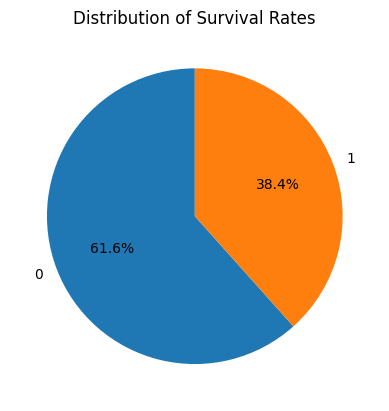

In [26]:
df['Survived'].value_counts().plot(kind='pie',
                                   startangle= 90, 
                                   autopct = '%1.1f%%') 

plt.ylabel('')
plt.title('Distribution of Survival Rates')
plt.show()  

### 2. 🔍 **Create a subplot that displays the count of survivors categorized by gender & port of embarkation & Pclass**

In [27]:
cate_cols = ['Sex', 'Embarked', 'Pclass'] 
target = 'Survived' 

In [28]:
fig = plt.figure(figsize = (25, len(cate_cols)*6))  

<Figure size 2500x1800 with 0 Axes>

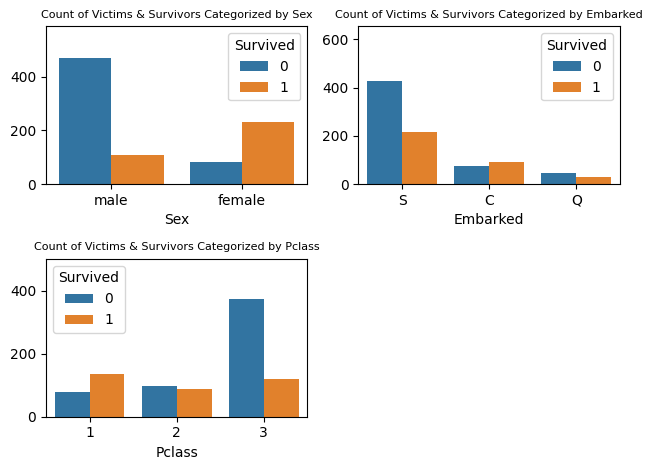

In [29]:
for i, col in enumerate(cate_cols):
    plt.subplot(len(cate_cols)//2 + len(cate_cols)%2, 2, i+1) 
    sns.countplot(x=col, hue=target, data=df) 
    plt.title(f'Count of Victims & Survivors Categorized by {col}', fontsize=8) 
    plt.ylim(0, df[col].value_counts().max()+10) 
    plt.ylabel('')


plt.tight_layout() 
plt.show() 


### 3. 🔍 **Create a histplot that displays the count of survivors categorized by Age**

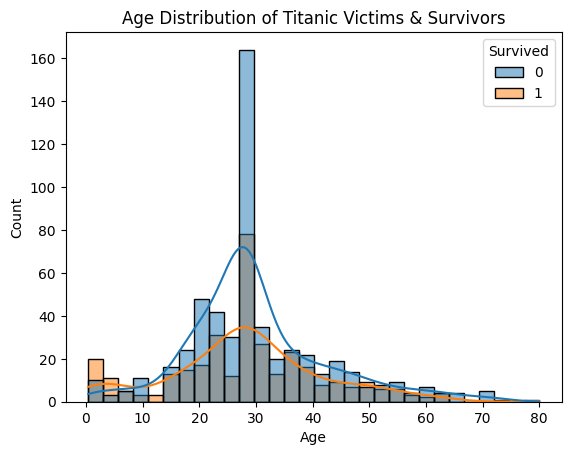

In [30]:
sns.histplot(data=df,
             x='Age', 
             hue='Survived', 
             bins=30,
             kde=True) 

plt.title('Age Distribution of Titanic Victims & Survivors')
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

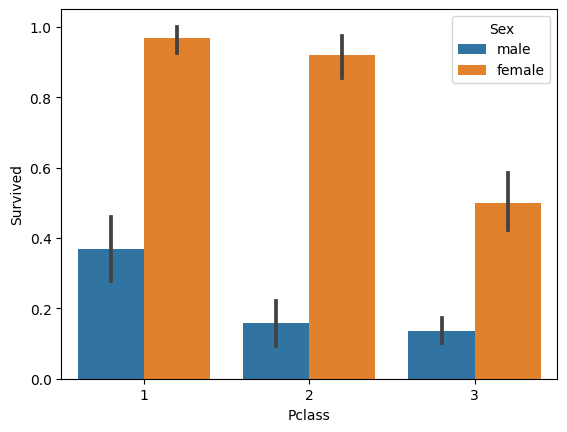

In [31]:
sns.barplot(x='Pclass',
            y = 'Survived', 
            hue = 'Sex', 
            data = df) 